In [16]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

LEARNING_RATE = 0.01 
NB_ITER = 500

def gradient_descent(X, Y, theta, nb_iter=NB_ITER, learning_rate=LEARNING_RATE, affich = True):
    couts = []
    theta1 = theta.copy()
    
    if (affich):
        afficher_droite(X, Y, theta1)
    
    # Définir l'algorithme de la descente de gradient : 
    for i in range(nb_iter):
        couts.append(J(X, Y, theta1))
        grad = gradient(X, Y, theta1)
        theta1 -=  learning_rate * grad
        
        if affich and i == nb_iter/2:
            afficher_droite(X, Y, theta1)
        
    if(affich):
        afficher_droite(X, Y, theta1)

    return theta1, couts

def normalise(X): 
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X-mean)/std, mean, std



# Extraction des caractéristiques 
def fractionner(df):
    X = df.iloc[:, :-1].values # Premières colonnes 
    Y = df.iloc[:,-1].values # Dernière colonne 
    return X, Y



def predire(X, theta):
    return np.dot(X, theta)


def afficher_droite(X, Y, theta):
    plt.scatter(X[:,1], Y, color="blue")
    plt.plot(X[:,1], predire(X, theta), color="red")
    plt.show()


def J(X, Y, theta):
    return np.mean((Y - predire(X, theta))**2)/2 


def gradient(X, Y, theta):
    error = (predire(X, theta)-Y)/X.shape[0]
    return  np.dot(X.T, error)

def gradient_descent2(X, Y, theta, nb_iter, learning_rate, affich = True, seuil=0.001):
    couts = []
    theta1 = theta.copy()
    couts.append(J(X, Y, theta1))
    
    if (affich):
        afficher_droite(X, Y, theta1)
    
    # Définir l'algorithme de la descente de gradient : 
    for i in range(nb_iter):
        grad = gradient(X, Y, theta1)
        theta1 -=  learning_rate * grad
        
        if affich and i == nb_iter/2:
            afficher_droite(X, Y, theta1)
        
        couts.append(J(X, Y, theta1))
        taux_changement = np.abs(couts[-1] - couts[-2])/couts[-2]
        if (taux_changement < seuil):
            break
        
    if(affich):
        afficher_droite(X, Y, theta1)

    return theta1, couts



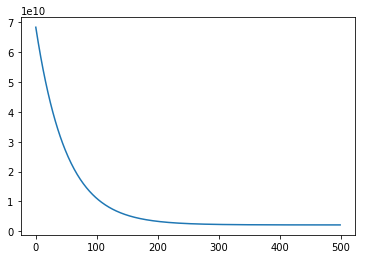

In [17]:

header = ["Superficie", "Prix"]
houses = pd.read_csv("datasets/houses.csv", names=header)

msk = np.random.rand(len(houses)) < 0.8 
X_train, Y_train = fractionner(houses[msk])
X_test, Y_test = fractionner(houses[~msk])


theta = np.random.rand(X_train.shape[1] + 1)




X_train, mean, std = normalise(X_train)

ones = np.ones([X_train.shape[0],1])
X_train = np.concatenate((ones, X_train), axis=1)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

theta, couts = gradient_descent(X_train, Y_train, theta, NB_ITER, LEARNING_RATE, affich = False)
plt.plot(couts)
plt.show()

In [18]:
#polinomiale deg 2
X_train2 = np.concatenate((X_train, (X_train[:, 1]**2).reshape((X_train.shape[0], 1))), axis=1)

theta2 = np.random.rand(X_train2.shape[1])

theta2 , couts2 = gradient_descent(X_train2, Y_train, theta2, NB_ITER, LEARNING_RATE, affich=False)

X_train2[:3, :]

array([[ 1.        ,  0.08666127,  0.00751018],
       [ 1.        , -0.74594813,  0.55643861],
       [ 1.        ,  1.1709898 ,  1.37121711]])

In [19]:
#polinomial deg 3
X_train3 = np.concatenate((X_train2, (X_train[:, 1]**3).reshape((X_train.shape[0], 1))), axis=1)

theta3 = np.random.rand(X_train3.shape[1])

theta3 , couts3 = gradient_descent(X_train3, Y_train, theta3, NB_ITER, LEARNING_RATE, affich=False)

X_train3[:3, :]

array([[ 1.00000000e+00,  8.66612737e-02,  7.51017636e-03,
         6.50841449e-04],
       [ 1.00000000e+00, -7.45948130e-01,  5.56438613e-01,
        -4.15074342e-01],
       [ 1.00000000e+00,  1.17098980e+00,  1.37121711e+00,
         1.60568125e+00]])

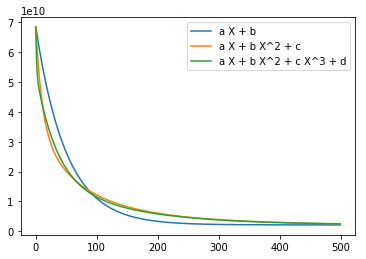

In [20]:
plt.plot(couts, label = "a X + b")
plt.plot(couts2, label = "a X + b X^2 + c")
plt.plot(couts3, label = "a X + b X^2 + c X^3 + d")
plt.legend()
#plt.autoscale()
plt.show()

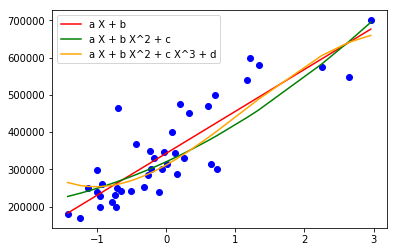

In [21]:
#Comparaison des estimateurs
idx = X_train[:,1].argsort()

X_train = X_train[idx]
X_train2 = X_train2[idx]
X_train3 = X_train3[idx]
Y_train = Y_train[idx] #pas besoin de ça, mais pour avoir les Y alignés avec les X

plt.scatter(X_train[:,1], Y_train, color="blue")
plt.plot(X_train[:,1], predire(X_train, theta), label = "a X + b", color="red")
plt.plot(X_train[:,1], predire(X_train2, theta2), label = "a X + b X^2 + c", color="green")
plt.plot(X_train[:,1], predire(X_train3, theta3), label = "a X + b X^2 + c X^3 + d", color="orange")
plt.legend()
#plt.autoscale()
plt.show()

In [22]:
#test des model
X_test = (X_test-mean)/std 

ones = np.ones([X_test.shape[0],1])

X_test = np.concatenate((ones, X_test), axis=1)
X_test2 = np.concatenate((X_test, (X_test[:, 1]**2).reshape((X_test.shape[0], 1))), axis=1)
X_test3 = np.concatenate((X_test2, (X_test[:, 1]**2).reshape((X_test.shape[0], 1))), axis=1)

erreur1 = np.sqrt(J(X_test, Y_test, theta))
erreur2 = np.sqrt(J(X_test2, Y_test, theta2))
erreur3 = np.sqrt(J(X_test3, Y_test, theta3))

erreur1, erreur2, erreur3

(37900.04491720093, 30940.99169933215, 34622.9087518815)

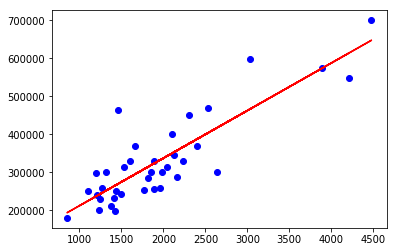

(0.6849761299940034, 0.15978546972358676)

In [28]:
from sklearn.model_selection import train_test_split  

X = houses.iloc[:, :-1].values # Premières colonnes 
Y = houses.iloc[:,-1].values # Dernière colonne 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)  



from sklearn.linear_model import LinearRegression  
regressor1 = LinearRegression(normalize=True)  
regressor1.fit(X_train, Y_train)  

plt.scatter(X_train, Y_train, color="blue")
plt.plot(X, regressor1.predict(X), color="red")
plt.show()



from sklearn.preprocessing import PolynomialFeatures

poly10 = PolynomialFeatures(degree=10, include_bias=False)
X_train10 = poly10.fit_transform(X_train)
X_test10 = poly10.fit_transform(X_test)

regressor10 = LinearRegression(normalize=True)  
regressor10.fit(X_train10, Y_train)

Y_pred1 = regressor1.predict(X_test)
Y_pred10 = regressor10.predict(X_test10)
Y_pred1,Y_pred10


from sklearn.metrics import  explained_variance_score

erreur1 = explained_variance_score(Y_test, Y_pred1)
erreur10 = explained_variance_score(Y_test, Y_pred10)

erreur1, erreur10
